<a href="https://colab.research.google.com/github/safakozdek/CMPE462-Machine-Learning-Homeworks/blob/master/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CMPE 462 HOMEWORK 3

In [0]:
# Allowed Libraries
import numpy as np
import matplotlib.pyplot as plt

# Multilayered Perceptron
**Target:** Implement multi-layer perceptron and analyze the results

**Data:**  The dataset (points2d.dat) is attached to the email. The sample includes 400 instances. Each instance is represented by a feature vector of 2 dimensions. The third column corresponds to the class (0/1/2) of the instance.

- Report how you split the sample for training and test. Report how you designed your neural network to solve this 3-class problem.(number of layers, error function etc.)
- Derive weight update equations using hyperbolic tangent activation function for hidden layers and sigmoid activation function for output layer . Submit a hard-copy of this derivation, drawing the the corresponding neural network with hidden units. All the formulas and the corresponding symbols should be clear. 
- Implement multi-layer perceptron with 5 hidden units. While training at each iteration, plot the error on training and test sets.
- After training converges: Plot the validation/test set and show true positives, true negatives,false positives, and false negatives (with different markers, colors, etc.)

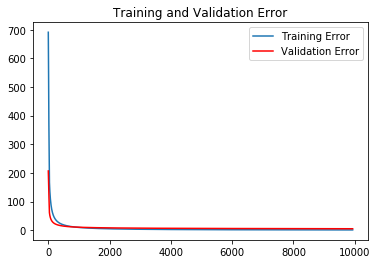

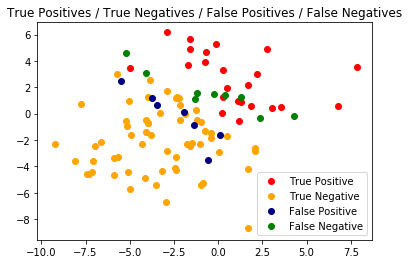

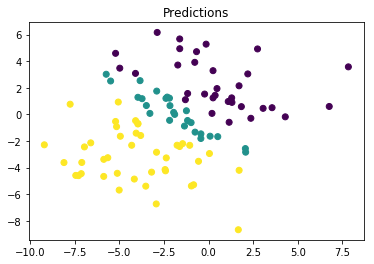

In [0]:
def confusion_matrix(labels, test_labels, test_data):
    points = [[[], [], []], [[], [], []], [[], [], []]]
    for i in range(len(labels)):
        points[int(test_labels[i])][int(labels[i])].append(test_data[i])
    return np.asarray(points)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))
  
  
def sigmoid_der(x):
    return sigmoid(x) * (1 - sigmoid(x))


def tanh_der(x):
    return 1.0 - np.tanh(x) ** 2


np.random.seed(1000)
data = np.loadtxt('points2d.dat')
train = data[:300]
test = data[300:]

train_data = train.T[0:2].T
train_labels = train.T[2].T

test_data = test.T[0:2].T
test_labels = test.T[2].T

labels_encoded = np.zeros((300, 3))
labels_encoded_test = np.zeros((100, 3))

for i in range(300):
    labels_encoded[i, int(train_labels[i])] = 1

for i in range(100):
    labels_encoded_test[i, int(train_labels[i])] = 1

w_hidden = np.random.rand(2, 5)  # weights of hidden layer
b_hidden = np.random.randn(5)  # bias of hidden layer

w_out = np.random.rand(5, 3)  # weights of output layer
b_out = np.random.randn(3)  # bias of output layer
alpha = 0.0001

error_train = []
validation_error = []
old_error = 1000000000

while True:
    # Forward
    z_hidden = np.dot(train_data, w_hidden) + b_hidden
    a_hidden = np.tanh(z_hidden)
    z_out = np.dot(a_hidden, w_out) + b_out
    a_out = sigmoid(z_out)

    # Back Propagation
    dz_out = -1 * sigmoid_der(z_out) * (labels_encoded / a_out)
    dw_out = np.dot(a_hidden.T, dz_out)
    db_out = dz_out
    dw_hidden = np.dot(train_data.T, tanh_der(z_hidden) * np.dot(dz_out, w_out.T))
    db_hidden = np.dot(dz_out, w_out.T) * tanh_der(z_hidden)

    # Update Weights
    w_hidden -= alpha * dw_hidden
    b_hidden -= alpha * db_hidden.sum(axis=0)
    w_out -= alpha * dw_out
    b_out -= alpha * db_out.sum(axis=0)

    loss = np.sum(-labels_encoded * np.log(a_out))
    #print('Loss function value: ', loss)
    error_train.append(loss)

    val = sigmoid(np.dot(np.tanh(np.dot(test_data, w_hidden) + b_hidden), w_out) + b_out)
    val_loss = np.sum(-labels_encoded_test * np.log(val))
    validation_error.append(val_loss)
    
    if old_error - loss < 0.0001:
        break
    old_error = loss

p = plt.subplot(1, 1, 1)
p.plot(error_train, label='Training Error')
p.plot(validation_error, c='r', label='Validation Error')
p.legend()
plt.title('Training and Validation Error')
plt.show()

predictions = [np.argmax(value) for value in val]
points = confusion_matrix(test_labels, predictions, test_data)

# Class 0 positive, rest is negative
plt.figure()
p = plt.subplot(1, 1, 1)
p.scatter(np.asarray(points[0][0]).T[0], np.asarray(points[0][0]).T[1], c='r', label='True Positive')
p.scatter(np.asarray(points[1][1]).T[0], np.asarray(points[1][1]).T[1], c='orange', label='True Negative')
p.scatter(np.asarray(points[2][1]).T[0], np.asarray(points[2][1]).T[1], c='orange')
p.scatter(np.asarray(points[1][2]).T[0], np.asarray(points[1][2]).T[1], c='orange')
p.scatter(np.asarray(points[2][2]).T[0], np.asarray(points[2][2]).T[1], c='orange')
p.scatter(np.asarray(points[1][0]).T[0], np.asarray(points[1][0]).T[1], c='navy', label='False Positive')
p.scatter(np.asarray(points[2][0]).T[0], np.asarray(points[2][0]).T[1], c='navy')
p.scatter(np.asarray(points[0][1]).T[0], np.asarray(points[0][1]).T[1], c='g', label='False Negative')
p.scatter(np.asarray(points[0][2]).T[0], np.asarray(points[0][2]).T[1], c='g')
p.legend()
plt.title('True Positives / True Negatives / False Positives / False Negatives')
plt.show()

# Predictions 
plt.figure()
plt.scatter(test_data.T[0], test_data.T[1], c=np.asarray(predictions))
plt.title('Predictions')
plt.show()
